Traducción al español de http://www.astropy.org/astropy-tutorials/Coordinates.html hecha por Germán Chaparro junto con material adicional.

# Usando `coordinates` y `table` para combinar y comparar catálogos

In [1]:
import urllib
import IPython.display

In [4]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [6]:
hcg7_center = SkyCoord.from_name('Hcg 7')
hcg7_center

<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88805556)>

Al final de la sección anterior, encontramos que HCG7 está en SDSS, lo que significa que podemos descargar catálogos de objetos directamente desde SDSS. Más adelante, combinaremos este catálogo con otro catálogo que cubra el mismo campo, permitiéndonos hacer gráficas combinando ambos catálogos.

Vamos a entrar a la base de datos SQL de SDSS usando el paquete [astroquery](https://astroquery.readthedocs.org).  This will require an internet connection and a working install of astroquery. Si usted no tiene este paquete, puede ignorar las próximas dos celdas, porque los archivos de datos están en el repositorio. Dependiendo de su versión de `astroquery`, puede que aparezca un Warning, que podemos ignorar sin problema. 

En esta URL encontramos algunas opciones que se pueden poner en el query
http://skyserver.sdss.org/dr14/en/help/browser/browser.aspx#&&history=description+PhotoObj+V

In [31]:
from astroquery.sdss import SDSS
sdss = SDSS.query_region(coordinates=hcg7_center, radius=20*u.arcmin, 
                         spectro=True, # 
                         photoobj_fields=['ra','dec','u','g','r','i','z'])

Los *queries* hechos a `astroquery` nos devuelve un objeto [`astropy.table.Table`](http://docs.astropy.org/en/stable/table/index.html).  Podemos trabajar con este objeto sin guardar nada en disco, pero en esta ocasión si lo haremos. De esta manera, al cerrar la sesión y volver, usted no tiene que hacer un *query* de nuevo.

(Esto no funcionará si usted no corrió la celda anterior. No hay problema, simplemente vaya a la celda que tiene ``Table.read`` y use la copia de esta tabla, incluida en el repositorio.)

In [33]:
sdss.write('HCG7_SDSS_photo.dat', format='ascii',overwrite=True)

Si usted no tiene internet, simplemente puede leer la tabla desde Python corriendo la siguiente celda. Si usted hizo el query anterior, usted puede ignorar esta instrucción, dado que la tabla ya está almacenada en memoria como la variable llamada `sdss`.

In [34]:
sdss = Table.read('HCG7_SDSS_photo.dat', format='ascii')

Ahora tenemos un catálogo de objetos que obtuvimos de SDSS. Supongamos que usted tiene su propio catálogo de objetos en el mismo campo para compararlo con el de SDSS. En este caso usaremos un catálogo extraído de [2MASS](http://www.ipac.caltech.edu/2mass/).  Vamos a cargar este catálogo (que está en el repositorio) a Python.

In [16]:
twomass = Table.read('HCG7_2MASS.tbl', format='ascii')

Para combinar los catálogos, necesitamos objetos `SkyCoord`. Vamos a contruirlos a partir de las tablas que cargamos. Esto resulta ser directo: tomamos las columnas `ra` y `dec` de la tabla y se las damos al constructor `SkyCoord` constructor.  Primero hagamos una inspección de las tablas.

In [35]:
sdss[0:5]

ra,dec,u,g,r,i,z,z1
float64,float64,float64,float64,float64,float64,float64,float64
9.48301378408814,1.01446279778812,23.51845,22.13895,20.82912,19.92155,19.47135,0.5575309
9.48301378408814,1.01446279778812,23.51845,22.13895,20.82912,19.92155,19.47135,0.5577446
9.48341569139689,0.976399855054926,22.81118,22.03554,22.10897,22.14101,21.64411,2.346115
9.48404442918999,0.668844321347565,21.08944,18.71639,17.1889,15.90083,15.19136,9.49495e-05
9.48407695277552,1.19045532333533,23.89431,22.32235,21.00772,19.96612,19.64056,0.5949758


In [18]:
twomass[0:5]

designation,ra,dec,r_k20fe,j_m_k20fe,j_msig_k20fe,j_flg_k20fe,h_m_k20fe,h_msig_k20fe,h_flg_k20fe,k_m_k20fe,k_msig_k20fe,k_flg_k20fe,k_ba,k_phi,sup_ba,sup_phi,r_ext,j_m_ext,j_msig_ext,h_m_ext,h_msig_ext,k_m_ext,k_msig_ext,cc_flg,dist,angle
,deg,deg,arcsec,mag,mag,,mag,mag,,mag,mag,,,deg,,deg,arcsec,mag,mag,mag,mag,mag,mag,,arcsec,deg
str16,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64
00402069+0052508,10.086218,0.880798,9.4,13.835,0.068,0,13.01,0.086,0,12.588,0.089,0,0.8,70,0.82,35,18.62,13.632,0.088,12.744,0.104,12.398,0.105,0,972.120611,91.538952
00395984+0103545,9.99935,1.06514,12.9,12.925,0.035,0,12.183,0.042,0,11.89,0.067,0,0.8,35,0.7,40,35.9,12.469,0.048,11.91,0.066,11.522,0.087,0,916.927636,45.951861
00401849+0049448,10.077062,0.82913,6.0,14.918,0.086,0,14.113,0.107,0,13.714,0.103,0,0.6,-15,1.0,90,11.35,14.631,0.121,13.953,0.169,13.525,0.161,0,962.489231,102.73149
00395277+0057124,9.969907,0.953472,5.3,14.702,0.049,0,14.248,0.069,0,13.899,0.095,0,0.6,-60,0.44,-50,10.59,14.62,0.144,14.15,0.296,13.73,0.2,0,601.136444,66.93659
00401864+0047245,10.077704,0.790143,7.6,15.585,0.134,1,15.003,0.18,1,14.049,0.142,1,0.5,30,0.46,30,14.48,14.977,0.138,14.855,0.303,13.653,0.18,0,1004.982128,110.53147


Ya que tenemos las columnas de `ra` y `dec` podemos usarlas para crear nuestros `SkyCoord`s.

No es necesario crear un `SkyCoord` para cada fila en la tabla. En vez de esto, aprovechamos que `SkyCoord` recibe *arrays* de valores de coordenadas, ya sean `Quantity`s, listas de *strings*, columnas de `Table`s, etc., y `SkyCoord` hará las operaciones tranquilamente elemento a elemento.

In [19]:
coo_sdss = SkyCoord(sdss['ra']*u.deg, sdss['dec']*u.deg)
coo_twomass = SkyCoord(twomass['ra'], twomass['dec'])

In [20]:
coo_twomass

<SkyCoord (ICRS): (ra, dec) in deg
    [(10.086218, 0.880798), ( 9.99935 , 1.06514 ), (10.077062, 0.82913 ),
     ( 9.969907, 0.953472), (10.077704, 0.790143), ( 9.895219, 0.859882),
     ( 9.873526, 1.063769), (10.139293, 0.818865), ( 9.888305, 0.597381),
     ( 9.959649, 0.595693), ( 9.928026, 0.627663), ( 9.912468, 0.642384),
     (10.028815, 0.683197), ( 9.824936, 0.699687), ( 9.699858, 0.582578),
     ( 9.766345, 0.849419), ( 9.805797, 0.864135), ( 9.824418, 0.912743),
     ( 9.744971, 0.957478), ( 9.828303, 0.891909), ( 9.80055 , 1.044691),
     ( 9.666268, 1.078968), ( 9.704872, 0.839244)]>

Hay una diferencia sutil. Para SDSS tuvimos que dar unidades, pero no para 2MASS. Esto es porque la tabla de 2MASS tiene unidades asociadas a las columnas, mientras que SDSS no tiene unidades.

Ahora usamos el método ``SkyCoord.match_to_catalog_sky`` para combinar ambos catálogos. El orden importa: combinamos 2MASS sobre SDSS porque hay muchas más entradas en SDSS, de manera que es probable que casi todos los objetos de 2MASS están en SDSS y no al revés.

In [21]:
idx_sdss, d2d_sdss, d3d_sdss = coo_twomass.match_to_catalog_sky(coo_sdss)

``idx`` da los índices de ``coo_sdss`` que se ajustan mejor a SDSS, mientras ``d2d`` y ``d3d`` son las distancias en cielo y en espacio real entre posibles coincidencias. En nuestro caso ignoraremos ``d3d`` porque no dimos información sobre la distancia a lo largo de la línea de visión. En cambio ``d2d`` nos da un buen diagnóstico de las posibles coincidencias:

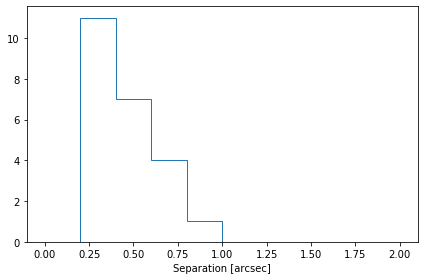

In [22]:
plt.hist(d2d_sdss.arcsec, histtype='step', range=(0,2))
plt.xlabel('Separation [arcsec]')
plt.tight_layout()

Ok, todos están dentro de un arcosegundo, lo cual es prometedor. Pero, ¿estamos seguros de que no es sólo que cualquier objeto tendría coincidencias dentro de un segundo de arco? Vamos a comprobarlo comparando con un conjunto de puntos aleatorios.

Primero creamos un conjunto de puntos uniformemente aleatorios (con un tamaño que coincida con `coo_twomass`) que cubran el mismo rango de RA/Decs que hay en `coo_sdss`. Esto lo haremos con el método `ptp()` (peak-to-peak), que es equivalente a tomar la diferencia entre el valor máximo y mínimo de un arreglo.

In [ ]:
ras_sim = np.random.rand(len(coo_twomass))*coo_sdss.ra.ptp() + coo_sdss.ra.min()
decs_sim = np.random.rand(len(coo_twomass))*coo_sdss.dec.ptp() + coo_sdss.dec.min()
ras_sim, decs_sim


Observemos que no es necesario especificar explícitamente las unidades para `ras_sim` y `decs_sim`, porque ya son objetos con unidad `Angle` porque fueron creados desde `coo_sdss.ra`y `coo_sdss.dec`.

Ahora creamos un objeto `SkyCoord` a partir de estos puntos y lo cotejamos con `coo_sdss` tal y como hicimos anteriormente para 2MASS.

In [ ]:
coo_simulated = SkyCoord(ras_sim, decs_sim)  
idx_sim, d2d_sim, d3d_sim = coo_simulated.match_to_catalog_sky(coo_sdss)

In [ ]:
plt.hist(d2d_sim.arcsec, bins='auto', histtype='step', label='Simulated', linestyle='dashed')
plt.hist(d2d_sdss.arcsec, bins='auto', histtype='step', label='2MASS')
plt.xlabel('separation [arcsec]')
plt.legend(loc=0)
plt.tight_layout()

Muy bien, parece que las fuentes colocadas al azar están a un minuto de arco de distancia, así que probablemente podemos confiar en que nuestras primeras coincidencias (que estaban a un segundo de arco) son válidas.

Ahora podemos calcular cosas como colores que combinen la fotometría de SDSS y 2MASS.

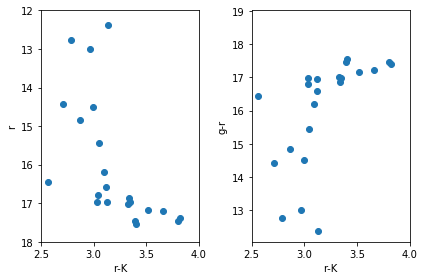

In [23]:
rmag = sdss['r'][idx_sdss]
grcolor = sdss['g'][idx_sdss] - rmag
rKcolor = rmag - twomass['k_m_ext']

plt.subplot(1, 2, 1)
plt.scatter(rKcolor, rmag)
plt.xlabel('r-K')
plt.ylabel('r')
plt.xlim(2.5, 4)
plt.ylim(18, 12) #mags go backwards!

plt.subplot(1, 2, 2)
plt.scatter(rKcolor, rmag)
plt.xlabel('r-K')
plt.ylabel('g-r')
plt.xlim(2.5, 4)
plt.tight_layout()

## Explorando Gaia con Astroquery y el servicio TAP

In [50]:
from astroquery.gaia import Gaia

In [51]:
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print(table.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.external.apassdr9
external.external.gaiadr2_astrophysical_parameters
external.external.gaiadr2_geometric_distance
external.external.gaiaedr3_distance
external.external.gaiaedr3_gcns_main_1
external.external.gaiaedr3_gcns_rejected_1
external.external.gaiaedr3_spurious
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.ravedr6
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.skymapperdr2_master
external.external.tmass_xsc
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour


Antes de empezar con Gaia, investiguemos un poco sobre nuestro cúmulo globular de interés https://en.wikipedia.org/wiki/NGC_2808

Exploremos https://archive.eso.org/dss/dss para mirar cómo se construye un query basado en URL.

In [ ]:
gc_name='ngc2808'

im_arcmin = 20
cutoutbaseurl = 'https://archive.eso.org/dss/dss/image'
endurl = '&Sky-Survey=DSS2-red&mime-type=download-gif&statsmode=WEBFORM'
query_string = urllib.parse.urlencode(dict(
                                     name=gc_name,
                                     x=im_arcmin, y=im_arcmin
                                          ))
url = cutoutbaseurl + '?' + query_string + endurl

urllib.request.urlretrieve(url, 'NGC2808_DSS2_cutout.jpg')

In [ ]:
IPython.display.Image('NGC2808_DSS2_cutout.jpg')

In [38]:
ngc2808_center = SkyCoord.from_name('ngc 2808')
ngc2808_center

<SkyCoord (ICRS): (ra, dec) in deg
    (138.01291667, -64.8635)>

In [45]:
# estimamos el ancho angular del cúmulo
ang_diam = 13*u.arcmin+0.8*u.arcsec
ang_diam.to(u.deg)

<Quantity 0.21688889 deg>

Vamos a hacer un query para Gaia que va a ser un _cone search_.
https://en.wikipedia.org/wiki/Kepler_space_telescope#/media/File:LombergA1024.jpg
https://gaia.aip.de/cms/services/cone-search/

Si hacemos un cone search normal, dado el número de fuentes de Gaia, se tomará mucho tiempo.

In [52]:
job1 = Gaia.launch_job_async("SELECT * \
FROM gaiadr3.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr3.gaia_source.ra,gaiadr3.gaia_source.dec), \
    CIRCLE('ICRS',138.01291667,-64.8635,0.22))=1", dump_to_file=True)

KeyboardInterrupt: 

Vamos a hacer un cone search truncado para ahorrarnos tiempo. Estimemos el rango de paralajes para truncar el cono de búsqueda.

In [39]:
meanpar=0.112 # Vasiliev 2021 edr3 https://arxiv.org/pdf/2102.09568.pdf 1e-2 error
dist=1*u.kpc/meanpar 
dist

<Quantity 8.92857143 kpc>

Estimemos el tamaño "a ojo" del cúmulo globular, para truncar nuestro cone search para un tamaño mucho mayor con tranquilidad.

In [54]:
r_gc=(dist*ang_diam/2).to(u.kpc*u.rad)/u.rad
r_gc

<Quantity 0.01689922 kpc>

In [40]:
prange=0.5*u.kpc # tomemos un rango amplio para truncar el cono de búsqueda
parmax=1/(dist-prange)
parmax

<Quantity 0.11864407 1 / kpc>

In [41]:
parmin=1/(dist+prange)
parmin

<Quantity 0.10606061 1 / kpc>

In [ ]:
job2 = Gaia.launch_job_async("SELECT * \
FROM gaiadr3.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr3.gaia_source.ra,gaiadr3.gaia_source.dec),CIRCLE('ICRS',138.01291667,-64.8635,0.22))=1 \
AND abs(parallax)>0.106 \
AND abs(parallax)<0.119;", dump_to_file=True)

In [ ]:
j = job2.get_results()
print (j['source_id']) 

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(j['ra'],j['dec'])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(j['ra']*np.pi/180,j['dec']*np.pi/180,1000/j['parallax'])
ax.set_xlabel("ra (deg)")
ax.set_ylabel("dec (deg)")
ax.set_zlabel("r (pc)")

In [ ]:
plt.hist(1000/j['parallax'])
plt.axvline(1000/parmin.value,c='r')
plt.axvline(1000/parmax.value,c='r')

Query sin ADQL explícito: https://astroquery.readthedocs.io/en/latest/gaia/gaia.html

Ahora vamos a hacer un diagrama H-R de este cúmulo usando las magnitudes medidas por Gaia.

In [ ]:
j.columns

In [ ]:
bp_rp = j['bp_rp'].data
mg = j['phot_g_mean_mag'].data

In [ ]:
filt=~(np.isnan(mg.data) | np.isnan(bp_rp.data))
(~filt).sum()

In [ ]:
x=bp_rp.data[filt]
y=mg.data[filt]

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6),dpi=150)
ax.scatter(x, y, alpha=1, s=10, color='k', zorder=0)
ax.invert_yaxis()
ax.set_xlabel(r'$G_{BP} - G_{RP}$')
ax.set_ylabel(r'$M_G$')
ax.set_title('Diagrama HR para NGC 2808')

https://www.researchgate.net/figure/The-observed-and-modeled-color-magnitude-diagrams-of-the-globular-cluster-NGC-2808-Yi_fig5_305273888

## Revisando inconsistencias en otras bases de datos

In [ ]:
from astroquery.simbad import Simbad

In [ ]:
customSimbad = Simbad()

customSimbad.get_votable_fields()

In [ ]:
customSimbad.add_votable_fields('plx')

In [ ]:
result_table = customSimbad.query_object("NGC 2808")
result_table

In [ ]:
result_table['PLX_VALUE']

In [ ]:
dist=1*u.kpc/(result_table['PLX_VALUE'][0])
dist

## Automatizando una búsqueda de Gaia

In [ ]:
from astropy.io.votable import parse_single_table

In [ ]:
votable = parse_single_table("lcc_simbad_votable.xml").to_table()

In [ ]:
first="SELECT * \
    FROM gaiadr2.gaia_source \
    WHERE "
stor="OR "
last=    "AND abs(parallax)>3.69 ;"

In [ ]:
(0.1*u.arcmin).to(u.deg)

In [ ]:
coun=0
for i,j in zip(votable['RA_d'],votable['DEC_d']):
    quer="CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',%f,%f,0.00166))=1 "%(i,j)
    if coun==0:
        mainq=first+quer
    if coun>0:
        mainq+=stor+quer
    coun+=1
mainq+=last

In [ ]:
mainq

In [ ]:
coun

In [ ]:
job3=Gaia.launch_job(mainq, dump_to_file=True)

In [ ]:
j = job3.get_results()
print (j['source_id']) 

In [ ]:
j=j[j['parallax']>3]

In [ ]:
j.write('lcc.dat',format='ascii')

In [ ]:
tablelcc=Table.read('lcc.dat',format='ascii')
tablelcc=tablelcc[np.isfinite(tablelcc['parallax'])]
tablelcc=tablelcc[np.isfinite(tablelcc['radial_velocity'])]
print(len(tablelcc),np.isnan(tablelcc['pmdec']).sum(),np.isnan(tablelcc['pmra']).sum())

In [ ]:
def astrosol(j):
    x=1000/j['parallax']*np.cos(j['dec']*np.pi/180)*np.cos(j['ra']*np.pi/180)
    y=1000/j['parallax']*np.cos(j['dec']*np.pi/180)*np.sin(j['ra']*np.pi/180)
    z=1000/j['parallax']*np.sin(j['dec']*np.pi/180)
    vx=[]
    vy=[]
    vz=[]
    xa=[]
    ya=[]
    za=[]
    for i in range(len(j)):
        mdec=j['dec'][i]
        mra=j['ra'][i]
        mpar=j['parallax'][i]
        mpmra=j['pmra'][i]
        mpmdec=j['pmdec'][i]
        mvr=j['radial_velocity'][i]
        c1 = coord.ICRS(ra=mra*u.degree, dec=mdec*u.degree,
                    distance=(mpar*u.mas).to(u.pc, u.parallax()),
                    pm_ra_cosdec=mpmra*u.mas/u.yr,
                    pm_dec=mpmdec*u.mas/u.yr,
                    radial_velocity=mvr*u.km/u.s)
        gc1 = c1.transform_to(coord.Galactocentric)
        vx+=[gc1.v_x.value]
        vy+=[gc1.v_y.value]
        vz+=[gc1.v_z.value]
        xa+=[gc1.x.value]
        ya+=[gc1.y.value]
        za+=[gc1.z.value]
    vx=np.array(vx)
    vy=np.array(vy)
    vz=np.array(vz)
    return x,y,z,vx,vy,vz,xa,ya,za

In [ ]:
lccas=astrosol(tablelcc)
x2,y2,z2,vx2,vy2,vz2,xa2,ya2,za2=lccas

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
norm=10
ax.quiver(xa2,ya2,za2,vx2/norm,vy2/norm,vz2/norm,arrow_length_ratio=0.5,color='r')
ax.set_xlabel('x (pc)')
ax.set_ylabel('y (pc)')
ax.set_zlabel('z (pc)')

Ejercicio: Calcular la edad cinématica de LCC estimando el momento de máximo acercamiento entre las estrellas de LCC.